In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

# Loading Dataset (Train and Test Data)

In [2]:
filename = 'train.csv'
trainData = pd.read_csv(filename)
print(trainData.shape)
testData = pd.read_csv('test.csv')
print(testData.shape)

(7352, 563)
(2947, 563)


In [3]:
trainData.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Preprocessing

#### Checking for Duplicates

In [4]:
print('No of duplicates in Train Data:',sum(trainData.duplicated()))
print('No of duplicates in Test Data :',sum(testData.duplicated()))

No of duplicates in Train Data: 0
No of duplicates in Test Data : 0


#### Checking for NaN/null values

In [5]:

print('No of NaN/Null values in Train Data:',trainData.isnull().values.sum())
print('No of NaN/Null values in Test Data:',testData.isnull().values.sum())

No of NaN/Null values in Train Data: 0
No of NaN/Null values in Test Data: 0


#### Data prepration


In [6]:
X_train = trainData.drop(['Activity'], axis = 1)
Y_train = trainData['Activity']
X_test = testData.drop(['Activity'], axis = 1)
Y_test = testData['Activity']

# Transforming non-numerical value in Y to numerical value using label Encoder
le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
Y_test = le.transform(Y_test)
print(le.classes_)

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


#### Normalising the data

In [7]:
from sklearn import preprocessing
X_train_n = preprocessing.normalize(X_train)
X_test_n =  preprocessing.normalize(X_test)

#### Feature Scaling 

In [8]:
# MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X_train_n)
X_train_mm = scaler1.transform(X_train_n)
X_test_mm = scaler1.transform(X_test_n)

# Standard Scaler
# from sklearn.preprocessing import StandardScaler
# scaler2 = StandardScaler().fit(X_train_n)
# X_train_st = scaler2.transform(X_train_n)
# X_test_st = scaler2.transform(X_test_n)

#### Preparing training and validation sets

In [9]:
from sklearn.model_selection import train_test_split
X_training, X_validation, Y_training, Y_validation = train_test_split(X_train_mm, Y_train, test_size=0.2, random_state=42)
X_testing=X_test_mm
Y_testing=Y_test

# Training the model

## SVM with Linear kernel

SVM with Linear Kernel
----------------------------------------------------------------------------------------------------

Tuned parameter Values, C : 100


Accuracy Score on Training Data: 0.9977894915830641

----------------------------------------------------------------------------------------------------
--------------------------------------For Validation Set--------------------------------------------

Accuracy Score on Validation Data: 0.9775662814411965

Confusion Matrix on Validation Data:


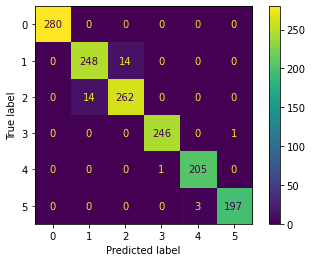

Normalised Confusion Matrix on Validation Data:


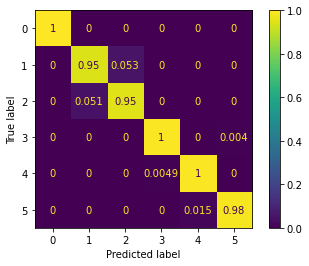

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.95      0.95      0.95       262
           2       0.95      0.95      0.95       276
           3       1.00      1.00      1.00       247
           4       0.99      1.00      0.99       206
           5       0.99      0.98      0.99       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471


----------------------------------------------------------------------------------------------------
--------------------------------------For Testing Set-----------------------------------------------

Accuracy Score on Testing Data: 0.9565659993213438

Confusion Matrix on Test Data:


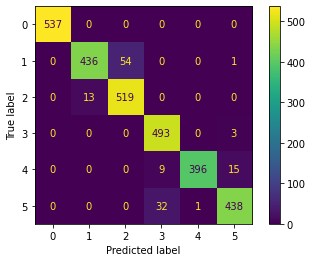

Normalised Confusion Matrix on Test Data:


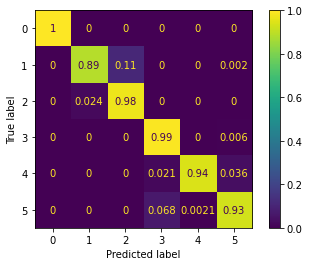

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.89      0.93       491
           2       0.91      0.98      0.94       532
           3       0.92      0.99      0.96       496
           4       1.00      0.94      0.97       420
           5       0.96      0.93      0.94       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [10]:
svc_linear = SVC(kernel='linear',C=100) 
svc_linear.fit(X_training,Y_training)


Y_training_pred = svc_linear.predict(X_training)
Y_validation_pred = svc_linear.predict(X_validation)
Y_testing_pred = svc_linear.predict(X_testing)

print("SVM with Linear Kernel")
print('----------------------------------------------------------------------------------------------------')
print()
print('Tuned parameter Values, C :',svc_linear.C)
print()
print()
print('Accuracy Score on Training Data:',accuracy_score(Y_training, Y_training_pred))
print()
print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Validation Set--------------------------------------------')
print()
print('Accuracy Score on Validation Data:',accuracy_score(Y_validation, Y_validation_pred))
print()
#CM=confusion_matrix(Y_validation, Y_validation_pred)
print("Confusion Matrix on Validation Data:")
#print(CM)
plot_confusion_matrix(svc_linear, X_validation, Y_validation)  
plt.show()
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
print("Normalised Confusion Matrix on Validation Data:")
#print(CM_normalised)
plot_confusion_matrix(svc_linear, X_validation, Y_validation,normalize='true')  
plt.show()
print("Classification Report on Validation Data:")
print(classification_report(Y_validation,Y_validation_pred))
print()


print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Testing Set-----------------------------------------------')
print()
print('Accuracy Score on Testing Data:',accuracy_score(Y_testing, Y_testing_pred))
print()
print("Confusion Matrix on Test Data:")
#CM=confusion_matrix(Y_test, Y_test_pred)
#print(CM)
plot_confusion_matrix(svc_linear, X_test_mm, Y_test)  
plt.show()
print("Normalised Confusion Matrix on Test Data:")
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
#print(CM_normalised)
plot_confusion_matrix(svc_linear, X_test_mm, Y_test,normalize='true')  
plt.show()
print("Classification Report on Test Data:")
print(classification_report(Y_testing, Y_testing_pred))

In [11]:
C_trials = [0.001, 0.01, 0.1, 1, 10, 100,1000]

for i in range(len(C_trials)):
    svc_linear = SVC(kernel='linear',C=C_trials[i]) 
    svc_linear.fit(X_training,Y_training)


    Y_training_pred = svc_linear.predict(X_training)
    Y_validation_pred = svc_linear.predict(X_validation)
    Y_testing_pred = svc_linear.predict(X_testing)



    print('Accuracy Score on Testing Data with C as', str(C_trials[i]),' :',accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with C as 0.001  : 0.7248048863250763
Accuracy Score on Testing Data with C as 0.01  : 0.9141499830335935
Accuracy Score on Testing Data with C as 0.1  : 0.9497794367153037
Accuracy Score on Testing Data with C as 1  : 0.9545300305395318
Accuracy Score on Testing Data with C as 10  : 0.9541907024092298
Accuracy Score on Testing Data with C as 100  : 0.9565659993213438
Accuracy Score on Testing Data with C as 1000  : 0.9565659993213438


## SVM with RBF kernel 

SVM with RBF Kernel
----------------------------------------------------------------------------------------------------

Tuned parameter Values, C : 100 , gamma : 0.02


Accuracy Score on Training Data: 0.9972793742560789

----------------------------------------------------------------------------------------------------
--------------------------------------For Validation Set--------------------------------------------

Accuracy Score on Validation Data: 0.9891230455472467

Confusion Matrix on Validation Data:


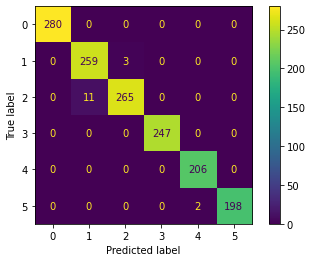

Normalised Confusion Matrix on Validation Data:


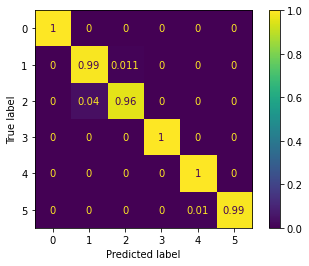

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.96      0.99      0.97       262
           2       0.99      0.96      0.97       276
           3       1.00      1.00      1.00       247
           4       0.99      1.00      1.00       206
           5       1.00      0.99      0.99       200

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471


----------------------------------------------------------------------------------------------------
--------------------------------------For Testing Set-----------------------------------------------

Accuracy Score on Testing Data: 0.9552086868001357

Confusion Matrix on Test Data:


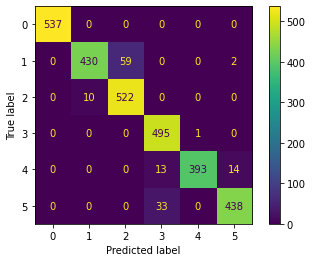

Normalised Confusion Matrix on Test Data:


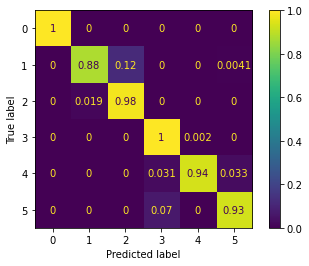

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.88      0.92       491
           2       0.90      0.98      0.94       532
           3       0.91      1.00      0.95       496
           4       1.00      0.94      0.97       420
           5       0.96      0.93      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.96      0.96      2947



In [12]:

svc_rbf = SVC(kernel='rbf',gamma=0.02,C=100)  # gamma='scale'
svc_rbf.fit(X_training,Y_training)


Y_training_pred = svc_rbf.predict(X_training)
Y_validation_pred = svc_rbf.predict(X_validation)
Y_testing_pred = svc_rbf.predict(X_testing)

print("SVM with RBF Kernel")
print('----------------------------------------------------------------------------------------------------')
print()
print('Tuned parameter Values, C :',svc_rbf.C,', gamma :',svc_rbf._gamma)
print()
print()
print('Accuracy Score on Training Data:',accuracy_score(Y_training, Y_training_pred))
print()
print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Validation Set--------------------------------------------')
print()
print('Accuracy Score on Validation Data:',accuracy_score(Y_validation, Y_validation_pred))
print()
#CM=confusion_matrix(Y_validation, Y_validation_pred)
print("Confusion Matrix on Validation Data:")
#print(CM)
plot_confusion_matrix(svc_rbf, X_validation, Y_validation)  
plt.show()
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
print("Normalised Confusion Matrix on Validation Data:")
#print(CM_normalised)
plot_confusion_matrix(svc_rbf, X_validation, Y_validation,normalize='true')  
plt.show()
print("Classification Report on Validation Data:")
print(classification_report(Y_validation,Y_validation_pred))
print()


print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Testing Set-----------------------------------------------')
print()
print('Accuracy Score on Testing Data:',accuracy_score(Y_testing, Y_testing_pred))
print()
print("Confusion Matrix on Test Data:")
#CM=confusion_matrix(Y_test, Y_test_pred)
#print(CM)
plot_confusion_matrix(svc_rbf, X_test_mm, Y_test)  
plt.show()
print("Normalised Confusion Matrix on Test Data:")
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
#print(CM_normalised)
plot_confusion_matrix(svc_rbf, X_test_mm, Y_test,normalize='true')  
plt.show()
print("Classification Report on Test Data:")
print(classification_report(Y_testing, Y_testing_pred))

In [13]:
trials = [0.001, 0.01, 0.1, 1, 10, 100]
#Make grid using above list
grid = []
for i in range(6):
    for j in range(4):
        grid.append((trials[i],trials[j]))

for i in range(len(grid)):
    svc_rbf = SVC(kernel='rbf',gamma=grid[i][1],C=grid[i][0])  # gamma='scale'
    svc_rbf.fit(X_training,Y_training)


    Y_training_pred = svc_rbf.predict(X_training)
    Y_validation_pred = svc_rbf.predict(X_validation)
    Y_testing_pred = svc_rbf.predict(X_testing)



    print('Accuracy Score on Testing Data with C=', str(grid[i][0]), 'gamma =', str(grid[i][1]), ':', accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with C= 0.001 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.01 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 0.01 : 0.35086528673227013
Accuracy Score on Testing Data with C= 0.01 gamma = 0.1 : 0.5887343060739735
Accuracy Score on Testing Data with C= 0.01 gamma = 1 : 0.22463522225992535
Accuracy Score on Testing Data with C= 0.1 gamma = 0.001 : 0.35086528673227013
Accuracy Score on Testing Data with C= 0.1 gamma = 0.01 : 0.7801153715643027
Accuracy Score on Testing Data with C= 0.1 gamma = 0.1 : 0.9144893111638955
Accuracy Score on Testing Data with C= 0.1 gamma = 1 : 0.5042416016287751
Accuracy Score on Testing Data with C= 1 gamma = 0.001 : 0.790295

In [14]:
svc_rbf = SVC(kernel='rbf',gamma = 'scale',C=10)  # gamma='scale'
svc_rbf.fit(X_training,Y_training)


Y_training_pred = svc_rbf.predict(X_training)
Y_validation_pred = svc_rbf.predict(X_validation)
Y_testing_pred = svc_rbf.predict(X_testing)
print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))

svc_rbf = SVC(kernel='rbf',gamma = 'scale',C=100)  # gamma='scale'
svc_rbf.fit(X_training,Y_training)


Y_training_pred = svc_rbf.predict(X_training)
Y_validation_pred = svc_rbf.predict(X_validation)
Y_testing_pred = svc_rbf.predict(X_testing)

print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))

svc_rbf = SVC(kernel='rbf',gamma = 'auto',C=10)  # gamma='scale'
svc_rbf.fit(X_training,Y_training)


Y_training_pred = svc_rbf.predict(X_training)
Y_validation_pred = svc_rbf.predict(X_validation)
Y_testing_pred = svc_rbf.predict(X_testing)
print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))

svc_rbf = SVC(kernel='rbf',gamma = 'auto',C=100)  # gamma='scale'
svc_rbf.fit(X_training,Y_training)


Y_training_pred = svc_rbf.predict(X_training)
Y_validation_pred = svc_rbf.predict(X_validation)
Y_testing_pred = svc_rbf.predict(X_testing)

print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with C= 10 gamma = 0.054715271470340124 : 0.9521547336274178
Accuracy Score on Testing Data with C= 100 gamma = 0.054715271470340124 : 0.9491007804546997
Accuracy Score on Testing Data with C= 10 gamma = 0.0017793594306049821 : 0.9382422802850356
Accuracy Score on Testing Data with C= 100 gamma = 0.0017793594306049821 : 0.9558873430607397


In [15]:
gamma_vals = [0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
for i in range(len(gamma_vals)):
  svc_rbf = SVC(kernel='rbf',gamma = gamma_vals[i],C=10)  # gamma='scale'
  svc_rbf.fit(X_training,Y_training)


  #Y_training_pred = svc_rbf.predict(X_training)
  #Y_validation_pred = svc_rbf.predict(X_validation)
  Y_testing_pred = svc_rbf.predict(X_testing)
  print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))



Accuracy Score on Testing Data with C= 10 gamma = 0.002 : 0.9416355615880556
Accuracy Score on Testing Data with C= 10 gamma = 0.004 : 0.9480827960637936
Accuracy Score on Testing Data with C= 10 gamma = 0.006 : 0.9521547336274178
Accuracy Score on Testing Data with C= 10 gamma = 0.008 : 0.9531727180183237
Accuracy Score on Testing Data with C= 10 gamma = 0.01 : 0.9521547336274178
Accuracy Score on Testing Data with C= 10 gamma = 0.02 : 0.9528333898880217
Accuracy Score on Testing Data with C= 10 gamma = 0.03 : 0.9531727180183237
Accuracy Score on Testing Data with C= 10 gamma = 0.04 : 0.9535120461486257
Accuracy Score on Testing Data with C= 10 gamma = 0.05 : 0.9524940617577197
Accuracy Score on Testing Data with C= 10 gamma = 0.06 : 0.9514760773668137
Accuracy Score on Testing Data with C= 10 gamma = 0.07 : 0.9514760773668137


In [16]:
gamma_vals = [0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
for i in range(len(gamma_vals)):
    svc_rbf = SVC(kernel='rbf',gamma = gamma_vals[i],C=100)  # gamma='scale'
    svc_rbf.fit(X_training,Y_training)


    Y_testing_pred = svc_rbf.predict(X_testing)
    print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_rbf._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))



Accuracy Score on Testing Data with C= 100 gamma = 0.002 : 0.9565659993213438
Accuracy Score on Testing Data with C= 100 gamma = 0.004 : 0.9531727180183237
Accuracy Score on Testing Data with C= 100 gamma = 0.006 : 0.9545300305395318
Accuracy Score on Testing Data with C= 100 gamma = 0.008 : 0.9548693586698337
Accuracy Score on Testing Data with C= 100 gamma = 0.01 : 0.9545300305395318
Accuracy Score on Testing Data with C= 100 gamma = 0.02 : 0.9552086868001357
Accuracy Score on Testing Data with C= 100 gamma = 0.03 : 0.9524940617577197
Accuracy Score on Testing Data with C= 100 gamma = 0.04 : 0.9507974211062097
Accuracy Score on Testing Data with C= 100 gamma = 0.05 : 0.9484221241940957
Accuracy Score on Testing Data with C= 100 gamma = 0.06 : 0.9494401085850017
Accuracy Score on Testing Data with C= 100 gamma = 0.07 : 0.9504580929759077


## SVM with polynomial kernel

SVM with Polynomial Kernel
----------------------------------------------------------------------------------------------------

Tuned parameter Values, C : 1 , gamma : 0.03 , degree : 3


Accuracy Score on Training Data: 0.9884373405883353

----------------------------------------------------------------------------------------------------
--------------------------------------For Validation Set--------------------------------------------

Accuracy Score on Validation Data: 0.9843643779741672

Confusion Matrix on Validation Data:


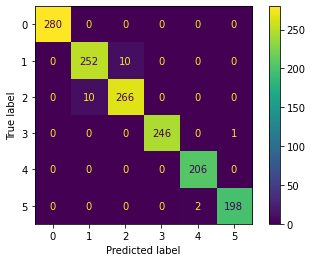

Normalised Confusion Matrix on Validation Data:


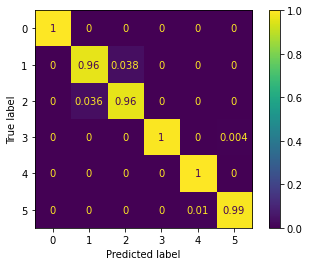

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.96      0.96      0.96       262
           2       0.96      0.96      0.96       276
           3       1.00      1.00      1.00       247
           4       0.99      1.00      1.00       206
           5       0.99      0.99      0.99       200

    accuracy                           0.98      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.98      0.98      0.98      1471


----------------------------------------------------------------------------------------------------
--------------------------------------For Testing Set-----------------------------------------------

Accuracy Score on Testing Data: 0.9545300305395318

Confusion Matrix on Test Data:


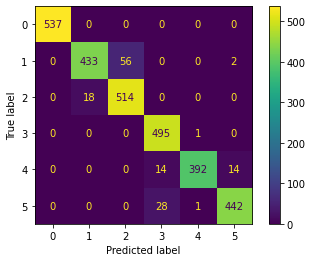

Normalised Confusion Matrix on Test Data:


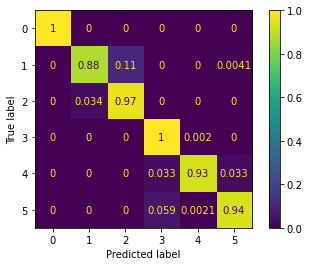

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.88      0.92       491
           2       0.90      0.97      0.93       532
           3       0.92      1.00      0.96       496
           4       0.99      0.93      0.96       420
           5       0.97      0.94      0.95       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



In [17]:
svc_poly = SVC(kernel='poly',degree=3,gamma=0.03,C=1) 
svc_poly.fit(X_training,Y_training)



Y_training_pred = svc_poly.predict(X_training)
Y_validation_pred = svc_poly.predict(X_validation)
Y_testing_pred = svc_poly.predict(X_testing)

print("SVM with Polynomial Kernel")

print('----------------------------------------------------------------------------------------------------')
print()
print('Tuned parameter Values, C :',svc_poly.C,', gamma :',svc_poly._gamma,', degree :',svc_poly.degree)
print()
print()
print('Accuracy Score on Training Data:',accuracy_score(Y_training, Y_training_pred))
print()
print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Validation Set--------------------------------------------')
print()
print('Accuracy Score on Validation Data:',accuracy_score(Y_validation, Y_validation_pred))
print()
#CM=confusion_matrix(Y_validation, Y_validation_pred)
print("Confusion Matrix on Validation Data:")
#print(CM)
plot_confusion_matrix(svc_poly, X_validation, Y_validation)  
plt.show()
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
print("Normalised Confusion Matrix on Validation Data:")
#print(CM_normalised)
plot_confusion_matrix(svc_poly, X_validation, Y_validation,normalize='true')  
plt.show()
print("Classification Report on Validation Data:")
print(classification_report(Y_validation,Y_validation_pred))
print()


print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Testing Set-----------------------------------------------')
print()
print('Accuracy Score on Testing Data:',accuracy_score(Y_testing, Y_testing_pred))
print()
print("Confusion Matrix on Test Data:")
#CM=confusion_matrix(Y_test, Y_test_pred)
#print(CM)
plot_confusion_matrix(svc_poly, X_test_mm, Y_test)  
plt.show()
print("Normalised Confusion Matrix on Test Data:")
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
#print(CM_normalised)
plot_confusion_matrix(svc_poly, X_test_mm, Y_test,normalize='true')  
plt.show()
print("Classification Report on Test Data:")
print(classification_report(Y_testing, Y_testing_pred))

In [18]:
n = [2,3,4,5]
for i in range(len(n)):
  svc_poly = SVC(kernel='poly',degree=n[i]) 
  svc_poly.fit(X_training,Y_training)

  Y_testing_pred = svc_poly.predict(X_testing)

  print('Accuracy Score on Testing Data with degree =',n[i],':',accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with degree = 2 : 0.9528333898880217
Accuracy Score on Testing Data with degree = 3 : 0.9521547336274178
Accuracy Score on Testing Data with degree = 4 : 0.9538513742789277
Accuracy Score on Testing Data with degree = 5 : 0.9531727180183237


In [19]:
trials = [0.001, 0.01, 0.1, 1, 10, 100]
#Make grid using above list
grid = []
for i in range(6):
    for j in range(4):
        grid.append((trials[i],trials[j]))

for i in range(len(grid)):
    svc_poly = SVC(kernel='poly',degree=3,gamma=grid[i][1],C=grid[i][0])  # gamma='scale'
    svc_poly.fit(X_training,Y_training)
    
    Y_testing_pred = svc_poly.predict(X_testing)



    print('Accuracy Score on Testing Data with C=', str(grid[i][0]), 'gamma =', str(grid[i][1]), ':', accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with C= 0.001 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.01 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.1 : 0.9311163895486936
Accuracy Score on Testing Data with C= 0.001 gamma = 1 : 0.9538513742789277
Accuracy Score on Testing Data with C= 0.01 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 0.01 : 0.3678316932473702
Accuracy Score on Testing Data with C= 0.01 gamma = 0.1 : 0.9524940617577197
Accuracy Score on Testing Data with C= 0.01 gamma = 1 : 0.9538513742789277
Accuracy Score on Testing Data with C= 0.1 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.1 gamma = 0.01 : 0.7790973871733967
Accuracy Score on Testing Data with C= 0.1 gamma = 0.1 : 0.9528333898880217
Accuracy Score on Testing Data with C= 0.1 gamma = 1 : 0.9538513742789277
Accuracy Score on Testing Data with C= 1 gamma = 0.001 : 0.1822192059

In [20]:
gamma_vals = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
for i in range(len(gamma_vals)):
    svc_poly = SVC(kernel='poly',gamma = gamma_vals[i])  # gamma='scale'
    svc_poly.fit(X_training,Y_training)


    Y_testing_pred = svc_poly.predict(X_testing)
    print('Accuracy Score on Testing Data with C=', str(svc_rbf.C), 'gamma =', str(svc_poly._gamma), ':', accuracy_score(Y_testing, Y_testing_pred))



Accuracy Score on Testing Data with C= 100 gamma = 0.01 : 0.9311163895486936
Accuracy Score on Testing Data with C= 100 gamma = 0.02 : 0.9514760773668137
Accuracy Score on Testing Data with C= 100 gamma = 0.03 : 0.9545300305395318
Accuracy Score on Testing Data with C= 100 gamma = 0.04 : 0.9528333898880217
Accuracy Score on Testing Data with C= 100 gamma = 0.05 : 0.9531727180183237
Accuracy Score on Testing Data with C= 100 gamma = 0.06 : 0.9535120461486257
Accuracy Score on Testing Data with C= 100 gamma = 0.07 : 0.9528333898880217


## SVM with sigmoid kernel

SVM with Sigmoid Kernel
----------------------------------------------------------------------------------------------------

Tuned parameter Values, C : 100 , gamma : 0.001


Accuracy Score on Training Data: 0.9761945247406904

----------------------------------------------------------------------------------------------------
--------------------------------------For Validation Set--------------------------------------------

Accuracy Score on Validation Data: 0.9700883752549286

Confusion Matrix on Validation Data:


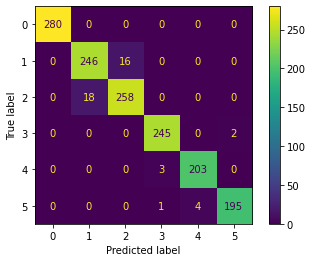

Normalised Confusion Matrix on Validation Data:


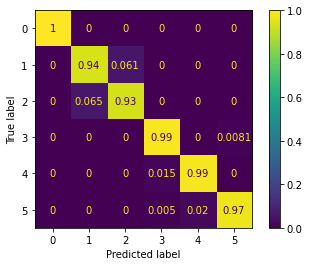

Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.93      0.94      0.94       262
           2       0.94      0.93      0.94       276
           3       0.98      0.99      0.99       247
           4       0.98      0.99      0.98       206
           5       0.99      0.97      0.98       200

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471


----------------------------------------------------------------------------------------------------
--------------------------------------For Testing Set-----------------------------------------------

Accuracy Score on Testing Data: 0.9491007804546997

Confusion Matrix on Test Data:


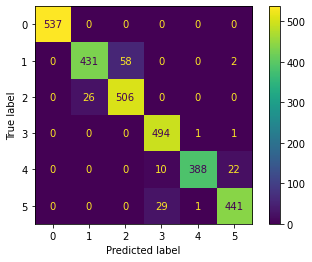

Normalised Confusion Matrix on Test Data:


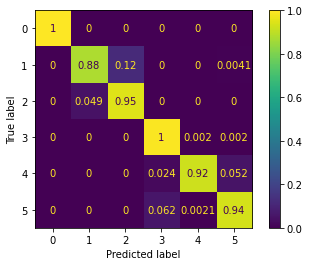

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.88      0.91       491
           2       0.90      0.95      0.92       532
           3       0.93      1.00      0.96       496
           4       0.99      0.92      0.96       420
           5       0.95      0.94      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [21]:
svc_sigmoid = SVC(kernel='sigmoid',gamma=0.001,C=100) 
svc_sigmoid.fit(X_training,Y_training)



Y_training_pred = svc_sigmoid.predict(X_training)
Y_validation_pred = svc_sigmoid.predict(X_validation)
Y_testing_pred = svc_sigmoid.predict(X_testing)

print("SVM with Sigmoid Kernel")
print('----------------------------------------------------------------------------------------------------')
print()
print('Tuned parameter Values, C :',svc_sigmoid.C,', gamma :',svc_sigmoid._gamma)
print()
print()
print('Accuracy Score on Training Data:',accuracy_score(Y_training, Y_training_pred))
print()
print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Validation Set--------------------------------------------')
print()
print('Accuracy Score on Validation Data:',accuracy_score(Y_validation, Y_validation_pred))
print()
#CM=confusion_matrix(Y_validation, Y_validation_pred)
print("Confusion Matrix on Validation Data:")
#print(CM)
plot_confusion_matrix(svc_sigmoid, X_validation, Y_validation)  
plt.show()
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
print("Normalised Confusion Matrix on Validation Data:")
#print(CM_normalised)
plot_confusion_matrix(svc_sigmoid, X_validation, Y_validation,normalize='true')  
plt.show()
print("Classification Report on Validation Data:")
print(classification_report(Y_validation,Y_validation_pred))
print()


print('----------------------------------------------------------------------------------------------------')
print('--------------------------------------For Testing Set-----------------------------------------------')
print()
print('Accuracy Score on Testing Data:',accuracy_score(Y_testing, Y_testing_pred))
print()
print("Confusion Matrix on Test Data:")
#CM=confusion_matrix(Y_test, Y_test_pred)
#print(CM)
plot_confusion_matrix(svc_sigmoid, X_test_mm, Y_test)  
plt.show()
print("Normalised Confusion Matrix on Test Data:")
#CM_normalised = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
#print(CM_normalised)
plot_confusion_matrix(svc_sigmoid, X_test_mm, Y_test,normalize='true')  
plt.show()
print("Classification Report on Test Data:")
print(classification_report(Y_testing, Y_testing_pred))

In [22]:
trials = [0.001, 0.01, 0.1, 1, 10, 100]
#Make grid using above list
grid = []
for i in range(6):
    for j in range(4):
        grid.append((trials[i],trials[j]))

for i in range(len(grid)):
    svc_rbf = SVC(kernel='sigmoid',gamma=grid[i][1],C=grid[i][0])  # gamma='scale'
    svc_rbf.fit(X_training,Y_training)
    
    Y_testing_pred = svc_rbf.predict(X_testing)



    print('Accuracy Score on Testing Data with C=', str(grid[i][0]), 'gamma =', str(grid[i][1]), ':', accuracy_score(Y_testing, Y_testing_pred))


Accuracy Score on Testing Data with C= 0.001 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.01 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 0.1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.001 gamma = 1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 0.001 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 0.01 : 0.1828978622327791
Accuracy Score on Testing Data with C= 0.01 gamma = 0.1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.01 gamma = 1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.1 gamma = 0.001 : 0.3498473023413641
Accuracy Score on Testing Data with C= 0.1 gamma = 0.01 : 0.5561588055649813
Accuracy Score on Testing Data with C= 0.1 gamma = 0.1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 0.1 gamma = 1 : 0.18221920597217509
Accuracy Score on Testing Data with C= 1 gamma = 0.001 : 0.72446